<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/projects/DylaLaurUnit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 3 Project: The Right Likelihood for the Job

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Info to save for later

No bernuelli likelihoods

Firefigher response time

https://opendata.minneapolismn.gov/datasets/b2d457b622094730a55f1ec731fab250_0/explore?showTable=true

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.1

In [3]:
import preliz as pz

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

#Subject

I chose firefighter response time for my data. My main queston is

**How long does it take for a firefighter team to respond to a fire call, and sucessfully "complete" the call**

The frist thing I had to do was setup some paramaters....

I found some data for the Minneapolis Fire Department on **Open Data**
A call is "completed" when firefighters raido clear to disbatch. This time is noted in the spreadsheet.

 Time will be denoted in minutes. This is because many (a shockingly large amout) of the calls took place in less than an hour.

 #Assumptions made

I assumed that Dispatch picked the fire station that had the quickest response time to the fire's location.

I assumed that weather/ traffic did not majorly affect the response time.


#Data Wrangling

After Doing spreadsheet Things
I Uploaded Raw Data to GitHUB
This serves as our base data. It was found on OpenData.com

In [5]:
#URL link to raw Data
url_Fire = 'https://raw.githubusercontent.com/Dyl-cmyk/datascience/refs/heads/main/Unit%203%20Project%20Data%20-%20Sheet1.csv'
#reading Raw data
data_Fire = pd.read_csv(url_Fire)
#viewing Raw data to make sure it works
data_Fire

,inci_no,descript,alm_date,alm_time,station,clr_date,clr_time,alarms,LastUpdateDate,StartDate,EndDate,Elapsed Time (Days),Elapsed Time (Hours),Elapsed Time (Minutes),Elapsed Time (Seconds)
0,19-0000150,"Cooking fire, confined to container",1/2/2019,0:27:50,8,1/2/2019,0:56:39,1,05/12/2020 10:51:51,01/02/2019 0:27:50,01/02/2019 0:56:39,0.020,0.480,28.817,1729.0
1,19-0000205,Passenger vehicle fire,1/2/2019,13:00:43,7,1/2/2019,13:16:45,1,05/12/2020 10:51:51,01/02/2019 13:00:43,01/02/2019 13:16:45,0.011,0.267,16.033,962.0
2,19-0000250,"Cooking fire, confined to container",1/2/2019,19:39:43,19,1/2/2019,20:11:34,1,05/12/2020 10:51:51,01/02/2019 19:39:43,01/02/2019 20:11:34,0.022,0.531,31.850,1911.0
3,19-0000300,"Excessive heat, scorch burns with no ignition",1/3/2019,8:00:48,19,1/3/2019,8:14:09,1,05/12/2020 10:51:51,01/03/2019 8:00:48,01/03/2019 8:14:09,0.009,0.222,13.350,801.0
4,19-0000342,"Outside rubbish, trash or waste fire",1/3/2019,15:46:36,7,1/3/2019,16:11:45,1,05/12/2020 10:51:51,01/03/2019 15:46:36,01/03/2019 16:11:45,0.017,0.419,25.150,1509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,19-0013480,Building fire,4/8/2019,22:08:25,14,4/8/2019,22:31:57,1,05/12/2020 10:51:51,04/08/2019 22:08:25,04/08/2019 22:31:57,0.016,0.392,23.533,1412.0
295,19-0013583,Dumpster or other outside trash receptacle fire,4/9/2019,16:41:44,16,4/9/2019,16:51:34,1,05/12/2020 10:51:51,04/09/2019 16:41:44,04/09/2019 16:51:34,0.007,0.164,9.833,590.0
296,19-0013615,Building fire,4/9/2019,22:33:40,6,4/9/2019,23:13:03,1,05/12/2020 10:51:51,04/09/2019 22:33:40,04/09/2019 23:13:03,0.027,0.656,39.383,2363.0
297,19-0013717,Passenger vehicle fire,4/10/2019,20:14:29,17,4/10/2019,21:17:03,1,05/12/2020 10:51:51,04/10/2019 20:14:29,04/10/2019 21:17:03,0.043,1.043,62.567,3754.0


(array([229.,  44.,  17.,   6.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  5.35  ,  82.2817, 159.2134, 236.1451, 313.0768, 390.0085,
        466.9402, 543.8719, 620.8036, 697.7353, 774.667 ]),
 <BarContainer object of 10 artists>)

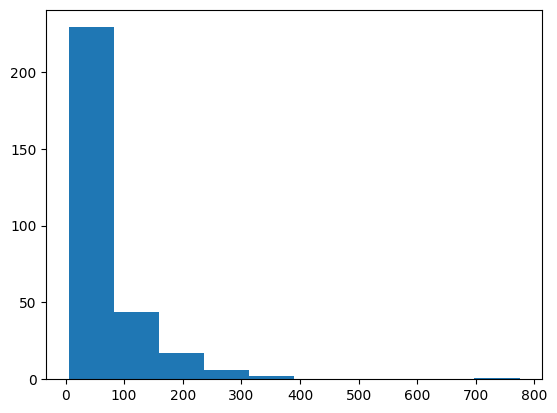

In [6]:
#grabbing percise data for graphing I am going to be measuring response time in minutes
pdata =data_Fire.loc[:,"Elapsed Time (Minutes)"]

plt.hist(pdata)

#Making Priors/Attempt 1

With my data in hand it is now time to find some Priors that show the moments in the data

My first attempt is with a Half StudentT graph this graph is supposed to model the genteral shape and **skewness** of the data[link text](https://)

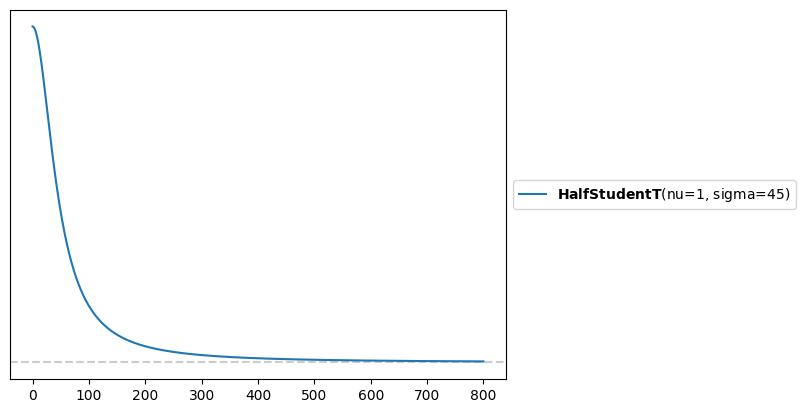

In [6]:
trial1 = pz.HalfStudentT(nu = 1, sigma = 45).plot_pdf(support=(0,800))

Now that I have a prior that matches the extreme positive skewness seen here lets try for a second prior. The goal of this is to match the **kurtosis** as well as the skewness

<Axes: >

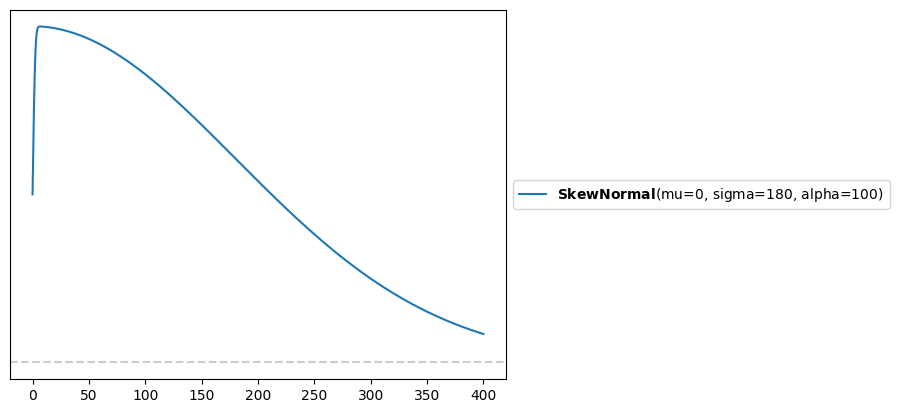

In [63]:
# hopefully this prior will show the characterisitics of the kurtosis
trial12 = pz.distributions.SkewNormal(mu=0, sigma =180, alpha = 100)
trial12.plot_pdf(support=(0,400))

Now we are going to find the posterior in order to run our PPC

In [44]:
#Half for our halfstudentT distrobution
with pm.Model() as model_FiredataHalf:
    # Here is our second prior
    μ = pm.SkewNormal('μ', mu=55, sigma=180, alpha = 100)

    #Here's our prior that we just created from the data
    σ = pm.HalfStudentT('σ',nu =1, sigma=45)

    #our fancy likelihood, with our two priors
    Y = pz.HalfStudentT('Y', nu= μ, sigma = σ,   observed=pdata)
    idata_FireHalfStud = pm.sample()

TypeError: HalfStudentT.__init__() got multiple values for argument 'nu'

Annnnndddd that didn't work. Let's look at the debug code

In [45]:
model_FiredataHalf.debug(
)

point={'μ': array(3538.27783608), 'σ_log__': array(3.80666249)}

The variable σ has the following parameters:
0: NoneConst{None} [id A] <NoneTypeT>
1: 1 [id B] <Scalar(int8, shape=())>
2: 45 [id C] <Scalar(int8, shape=())>
The parameters evaluate to:
0: None
1: 1
2: 45
Some of the values of variable σ are associated with a non-finite logp:
 value = 3.8066624897703196 -> logp = nan

You can set `verbose=True` for more details


It looks like the the value "sigma" has 3 peramaters (numbered 0-2) and paramater 0 is giving an error.

(What I didn't know when I wrote this ^ was that this third peramater was actually undefined, resulting in this error)

This means The HalfStudentT is probably the issue since that's what sigma is defining...so lets **try a different likelihood**

#Attempt #2

<Axes: >

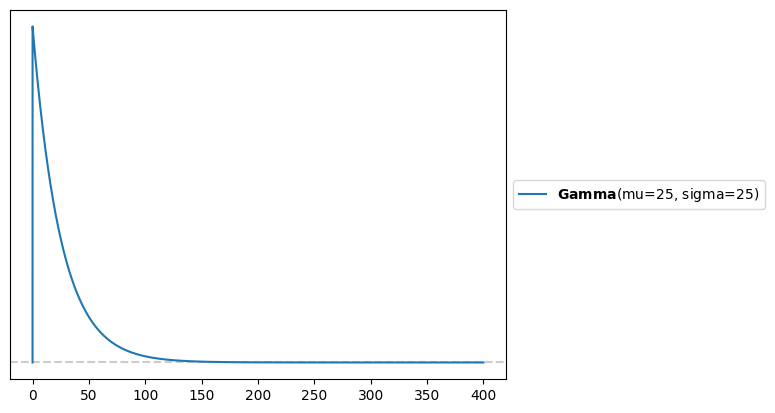

In [100]:
#I am going to use this Gamma graph in place of my HalfStudentT
pz.Gamma(mu= 25, sigma = 25).plot_pdf(support=(0,400))

This looks pretty similar to our HalfStudentT graph so let's try it in the Data

In [39]:
with pm.Model() as model_FiredataGamma:
    # im going to use our same SkewNormal since it didn't give us an error last time
    μ = pm.SkewNormal('μ', mu=0, sigma=180, alpha = 100)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.Gamma('σ', mu =25, sigma = 25)

    #our fancy new likelihood, with two priors
    Y = pm.Gamma('Y', alpha = μ, beta = σ, observed=pdata)
    idata_FireGamma = pm.sample()

Output()

Output()

AND IT WORKED!

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

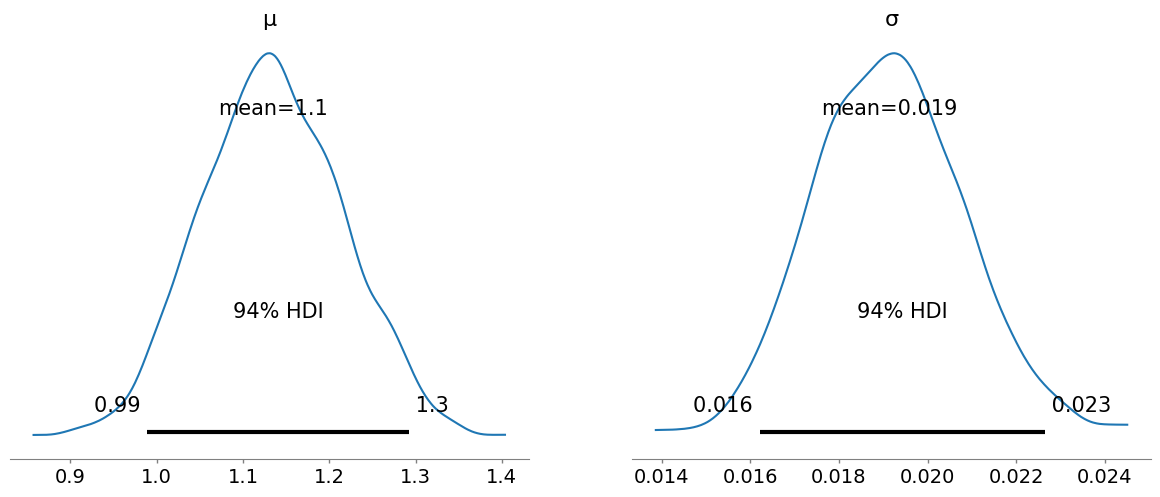

In [40]:
az.plot_posterior(idata_FireGamma)

Lookin Good so far!
Now let's check it with the PPC

In [41]:
pm.sample_posterior_predictive(idata_FireGamma, model=model_FiredataGamma, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

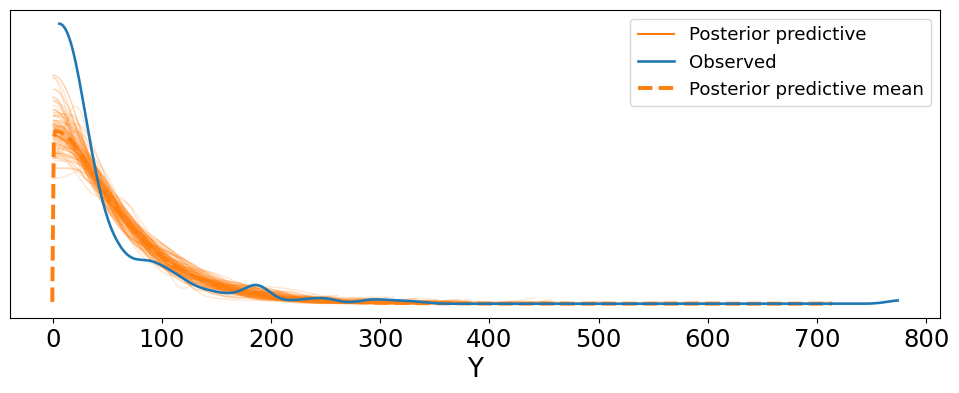

In [42]:
az.plot_ppc(idata_FireGamma, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

SO FAR SO GOOD!
It looks like my current major area of concern is the difference in **Kurtosis** between the PPC and the Observed Posterior. This leaves me some room for improvement, so let's try changing the SkewNormal for an Exponential

#Attempt #3
(Exponential)

<Axes: >

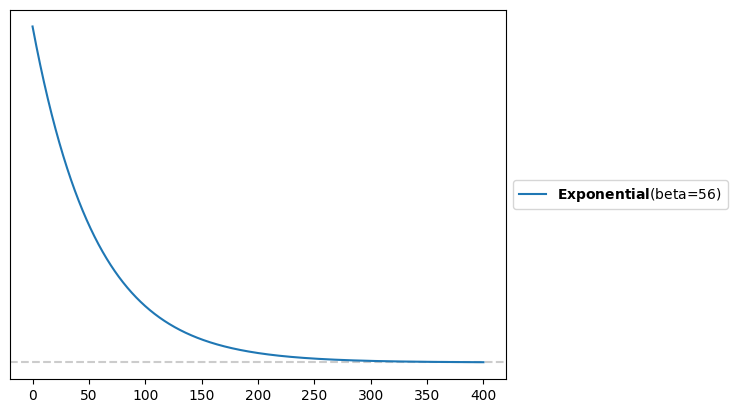

In [101]:
pz.Exponential(beta = 56).plot_pdf(support = (0,400))
#heres a good exponential

In [102]:
with pm.Model() as model_FiredataGamma:
    μ = pz.Exponential(beta = 56)

      #heres our "old" gamma
    σ = pm.Gamma('σ', mu =25, sigma = 25)

    #our fancy new likelihood, with two priors
    Y = pm.Gamma('Y', alpha = μ, beta = σ, observed=pdata)
    idata_FireGamma = pm.sample()

NotImplementedError: Cannot convert [1mExponential[0m(beta=56) to a tensor variable.

#Realization??

Welp. That didn't work. I guess exponentials aren't gonna help

In [ ]:
# IT was about this time when Mr.A and I realized that I was missing a varbile in my origional code


    with pm.Model() as model_FiredataHalf:
    # Here is our second prior
    μ = pm.SkewNormal('μ', mu=55, sigma=180, alpha = 100)

    #Here's our prior that we just created from the data
    σ = pm.HalfStudentT('σ',nu =1, sigma=45)

    #our fancy likelihood, with our two priors
    Y = pz.StudentT('Y', nu= μ, sigma = σ,   observed=pdatadrop)
        **this should be mu^** anddd im missing a third prior that would be nu
            idata_FireHalfStud = pm.sample()

In [ ]:
#let's try this one more time

<Axes: >

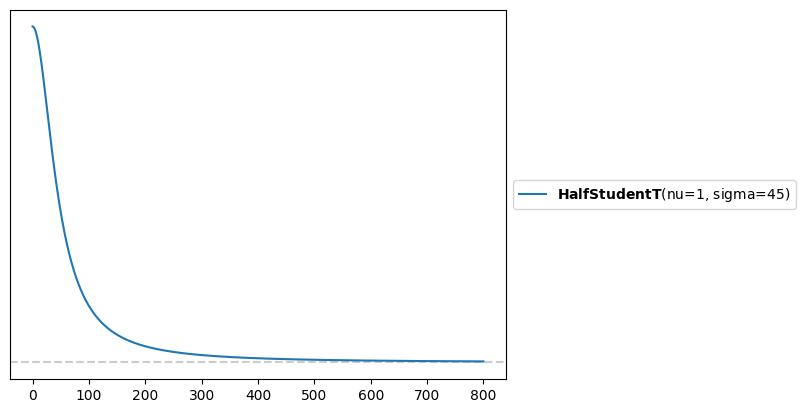

In [88]:
 #same HalfStudent as before
 pz.HalfStudentT(nu = 1, sigma = 45).plot_pdf(support=(0,800))

<Axes: >

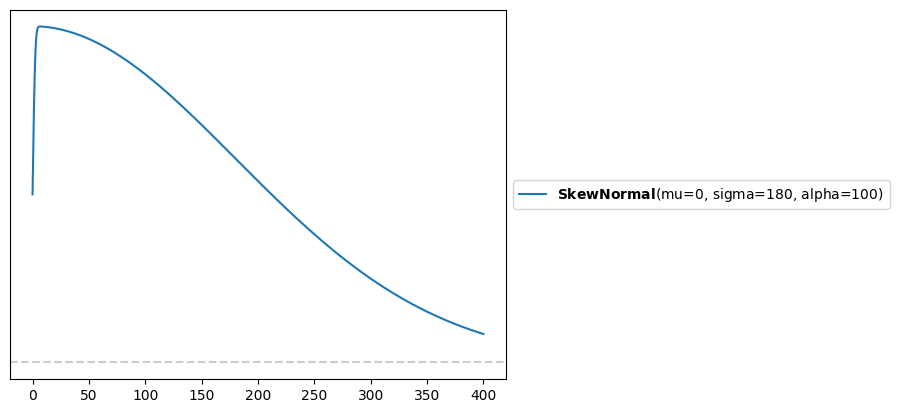

In [6]:
#same SkewNormal
trial12 = pz.distributions.SkewNormal(mu=0, sigma =180, alpha = 100)
trial12.plot_pdf(support=(0,400))

In [ ]:
#and the last piece...the gamma distrobution that worked last time

<Axes: >

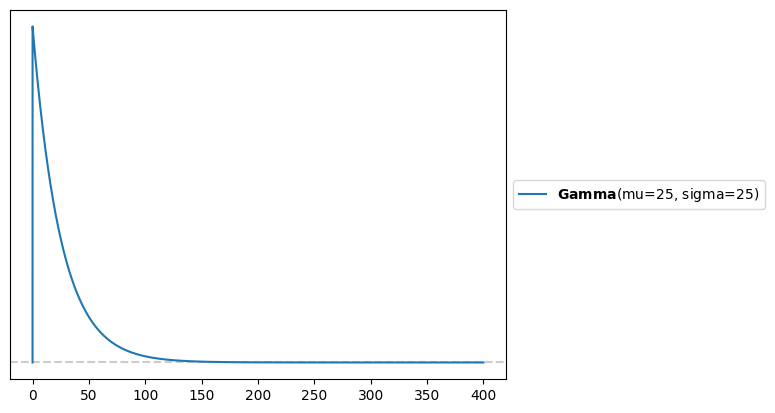

In [66]:
pz.Gamma(mu= 25, sigma = 25).plot_pdf(support=(0,400))

Now we can put it all together

In [97]:
with pm.Model() as model_FiredataHalf2:
#prior for permameter mu
    μ = pm.HalfStudentT('μ',nu =1, sigma=45)

#Here's our prior that we just created from the data
    σ = pm.SkewNormal('σ', mu=55, sigma=180, alpha = 100)

    v = pm.Gamma('v', mu =25, sigma = 25)

#our fancy likelihood, with our two priors
Y = pz.StudentT('Y',  mu= μ, sigma = σ, nu=v, observed = pdata)
idata_FireHalf2 = pm.sample()

TypeError: StudentT.__init__() got multiple values for argument 'nu'

DANG IT! The same issue is occouring. Let's look at the debug again

In [76]:
model_FiredataHalf2.debug()

point={'μ_log__': array(3.80666249), 'σ': array(3538.27783608), 'v_log__': array(3.21887582)}

The variable μ has the following parameters:
0: NoneConst{None} [id A] <NoneTypeT>
1: 1 [id B] <Scalar(int8, shape=())>
2: 45 [id C] <Scalar(int8, shape=())>
The parameters evaluate to:
0: None
1: 1
2: 45
Some of the values of variable μ are associated with a non-finite logp:
 value = 3.8066624897703196 -> logp = nan

You can set `verbose=True` for more details


Welll that sucks. I'm tired of this Half StudentT not working. Lets try it with something else

#Attempt #4
(Half Cauchy)

<Axes: >

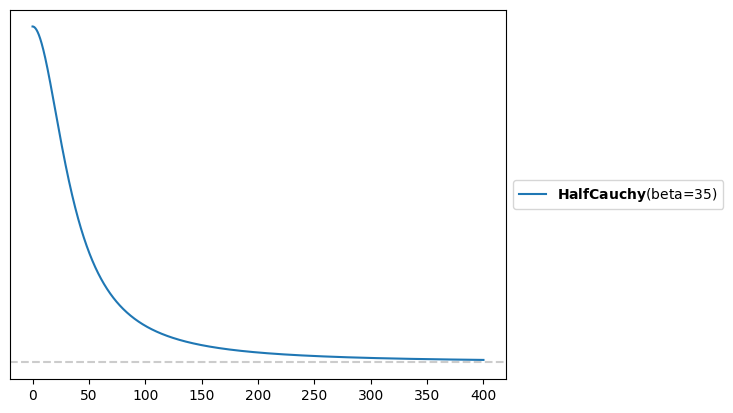

In [43]:
#ive been wanting to try this distrobution for a little bit because I think it will help with the kurtosis of our gamma posterior
pz.distributions.halfcauchy.HalfCauchy(beta=35).plot_pdf(support= (0,400))

In [44]:
with pm.Model() as model_FiredataCauchy:
    # Trying Cauchy
    μ = pm.HalfCauchy('μ', beta=35)
    # Here's our same gamma
    v = pm.Gamma('v', alpha=25, beta=25)
    # Our fancy likelihood, with our two priors
    Y = pm.Gamma('Y', alpha=μ, beta=v, observed= pdata)

    idata_FireCauchy = pm.sample()


Output()

Output()

In [45]:
pm.sample_posterior_predictive(idata_FireCauchy, model=model_FiredataCauchy, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

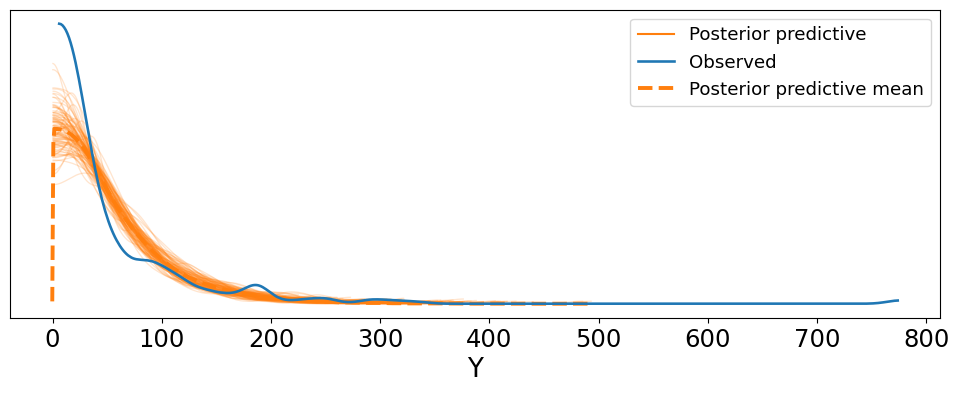

In [46]:
az.plot_ppc(idata_FireCauchy, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Okay, this is workable! It looks better than attempt #2 but still needs some work.

I am going to try to use the mean and STDEV of the pdata for mu and sigma in Gamma to see if that helps

#Attempt #5
Messing with Gamma

<Axes: >

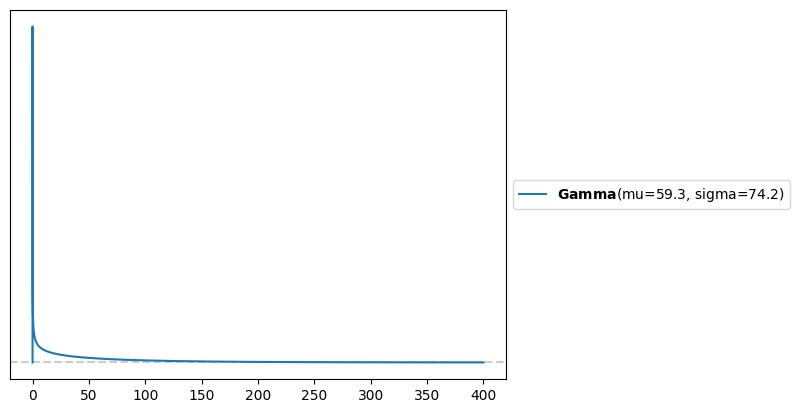

In [22]:
pz.Gamma(mu= 59.305, sigma = 74.2445903).plot_pdf(support=(0,400))

Wow that looks weird. Maybe it'll work

In [32]:
with pm.Model() as model_FiredataCauchy2:
    # Trying Cauchy
    μ = pm.HalfCauchy('μ', beta=60)
    # Here's our same gamma
    v = pm.Gamma('v', mu= 59.305, sigma = 74.2445903)
    # Our fancy likelihood, with our two priors
    Y = pm.Gamma('Y', alpha=μ, beta=v, observed= pdata)

    idata_FireCauchy2 = pm.sample()

Output()

Output()

In [33]:
pm.sample_posterior_predictive(idata_FireCauchy2, model=model_FiredataCauchy2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

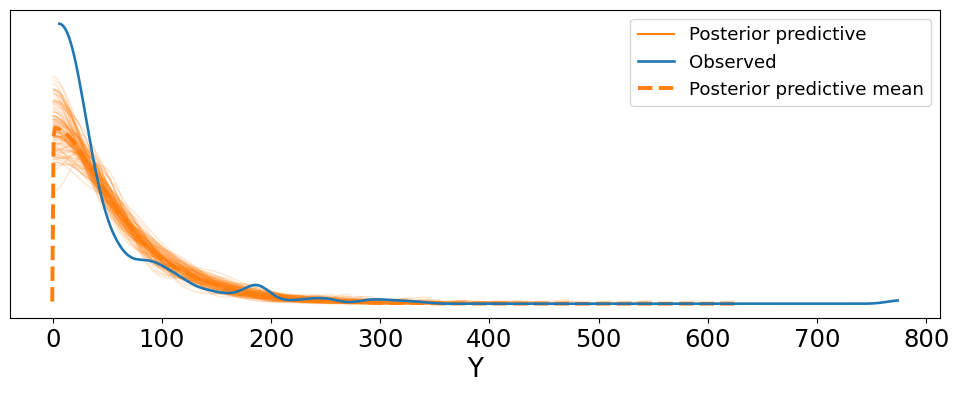

In [34]:
az.plot_ppc(idata_FireCauchy2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

WOW! That actually did something...IDk if it's quite in the right direction, but lets roll with it a little more.

#Attempt 6
Last chance

Okay, this is my last attempt before I call it quits. Lets see if adjusting the parameters of my old SkewNormal distrobtuion will do anything

<Axes: >

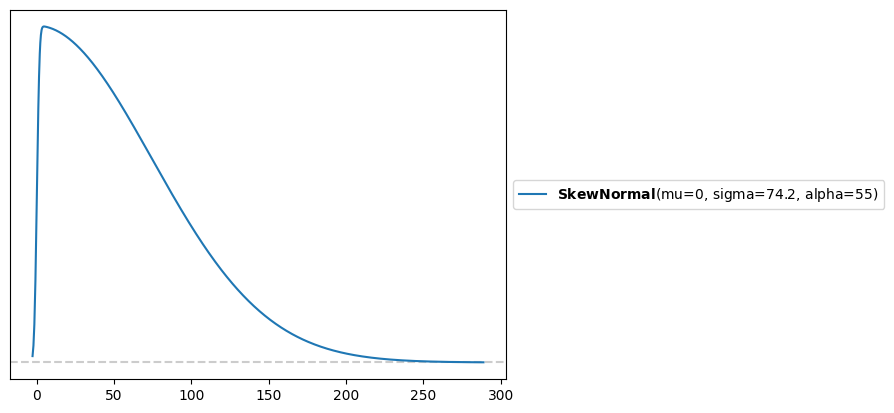

In [92]:
pz.SkewNormal(mu=0, sigma=74.2445903, alpha=55).plot_pdf()

In [97]:
with pm.Model() as model_FiredataGamma2:
    # im going to use a skewnormal with the lowest possible alpha i can to try to reduce the kurtosis
    μ = pm.SkewNormal('μ', mu=0, sigma=74.2445903, alpha=60)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.Gamma('σ', mu= 59.305, sigma = 74.2445903)

    #our fancy new likelihood, with two priors
    Y = pm.Gamma('Y', alpha = μ, beta = σ, observed=pdata)
    idata_FiredataGamma2 = pm.sample()

Output()

Output()

In [98]:
pm.sample_posterior_predictive(idata_FiredataGamma2, model=model_FiredataGamma2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

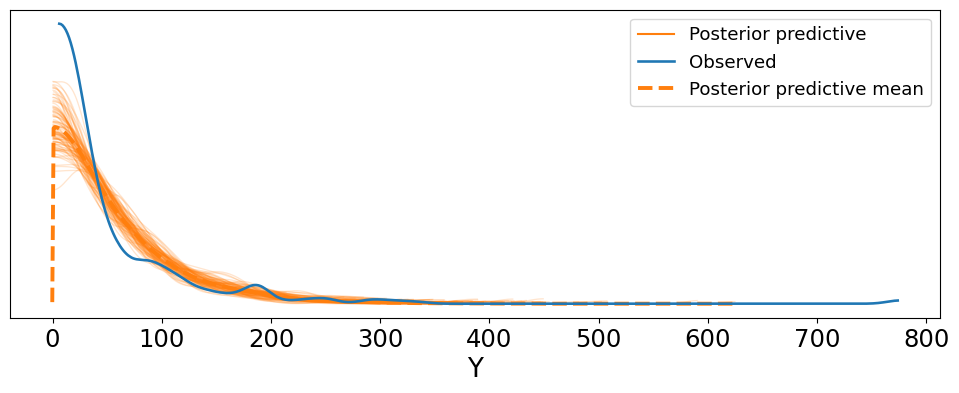

In [99]:
az.plot_ppc(idata_FiredataGamma2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Welllll I think this is the best we are going to get. It's currently 10:50 on Thurday night and I have done everyting I can to get this PPC as close as possible. To be fair. It has been improving So overall I am happy with the result.

#Conclusion


There was so so soooo much code that didn't make the cut because it was just me playing with numbers or going on wild Goose chases. What I have here are the acutual. Legitimate attempts that I acutally thought had a chance at working. This was way more difficult that last unit, but I have actually learned a lot over the course of this project as the trial and error and messing around has helped me know a little bit more about how these models operate.

BUT
I still don't know why that Stupid HalfStudentT graph didn't work :(












  P.S. The firefighters did a way better job at responding and completeing calls than I thought. Like most calls where sub 1hr